<a id="top"></a>

# Cross-validation

# Outline

- [Model evaluation metrics](#evaluation_metrics)

### Classification
- [Classification metrics](#classification_metrics)
- [Classification data](#classification_data)
- [View descriptive statistics](#wdbc_descriptive_statistics)
- [Create target and features](#create_y_and_X)
- [Split data into train and test](#train_test_split)
- [Dummy classifier](#dummy_classifier)
- [Make pipeline](#make_pipeline)
- [Cross-validation methods](#cross_validation_methods)
- [cross_val_score](#cross_val_score)
- [Stratified K-fold](#stratified_kfold)
- [Out of bag estimates](#oob_estimates)
- [Grid search](#grid_search)
- [Randomized search](#randomized_search)
- [Bayesian optimization](#bayesian_optimization)

### Regression
- [Regression metrics](#regression_metrics)
- [Regression data](#regression_data)
- [View descriptive statistics](#boston_descriptive_statistics)
- [Create target and features](#boston_create_y_and_X)
- [Split data into train and test](#boston_train_test_split)
- [Dummy regressor](#dummy_regressor)
- [Make pipeline](#boston_make_pipeline)
- [Cross-validation methods](#boston_cross_validation_methods)
- [cross_val_score](#boston_cross_val_score)
- [Stratified K-fold](#boston_kfold)
- [Out of bag estimates](#boston_oob_estimates)
- [Grid search](#boston_grid_search)
- [Randomized search](#boston_randomized_search)
- [Bayesian optimization](#boston_bayesian_optimization)

### Learning
- [Learning curve](#learning_curve)
- [Validation curve](#validation_curve)

## Import packages

In [1]:
# Manage data
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Plot data and display images
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
from IPython.display import Image

# Scale variables or parameters
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.preprocessing import scale, StandardScaler

# Create pipelines of operations
from sklearn.pipeline import make_pipeline

# Measure estimator performance 
from sklearn.metrics import make_scorer
# classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
# regression
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate estimator performance via cross-validation
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Use predictive models
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor

<a id="evaluation_metrics"></a>

# [Model Evaluation Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

"All scorer objects follow the convention that **higher return values are better than lower return values**.  Thus, metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric." - scikit-learn team

In [2]:
import sklearn
list(sklearn.metrics.SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jacca

<a id="classification_metrics"></a>

# [Classification Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

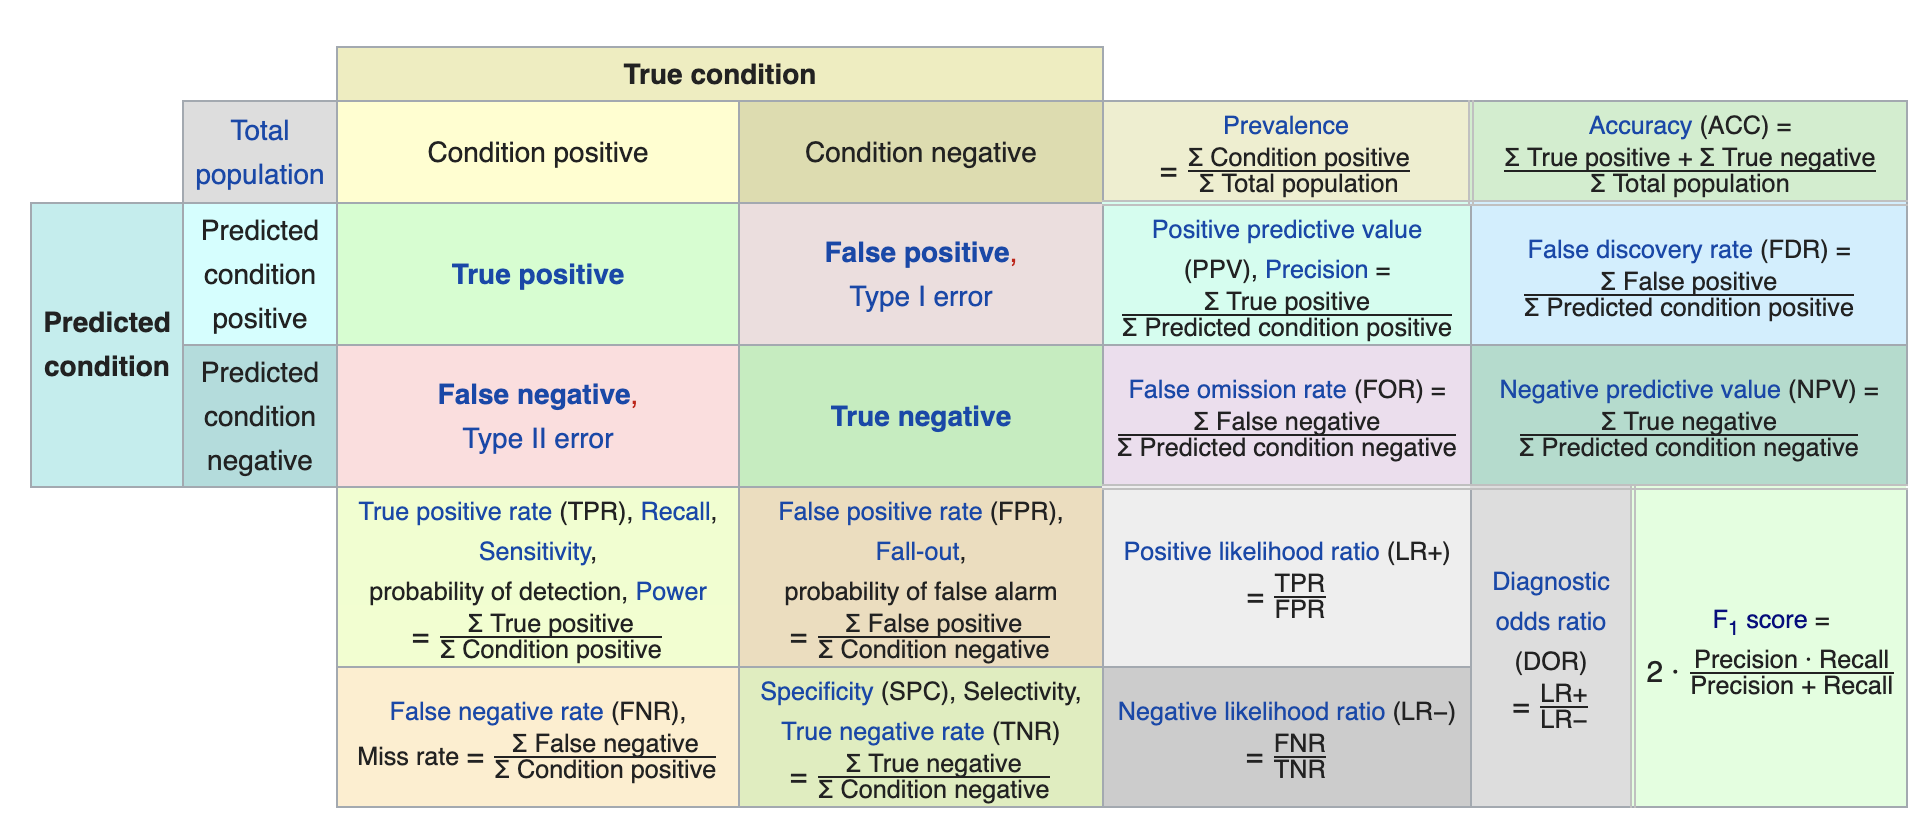

In [3]:
Image(filename='../images/binary_classification_table.png', width=900)

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Accuracy

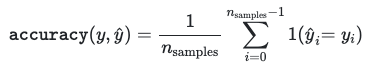

In [5]:
Image(filename='../images/def_accuracy.png', width=300)

## Precision

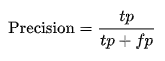

In [6]:
Image(filename='../images/def_precision.png', width=150)

## Recall

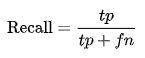

In [7]:
Image(filename='../images/def_recall.png', width=150)

## F1 score

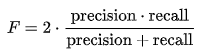

In [8]:
Image(filename='../images/def_F1_score.png', width=200)

## [Area under the ROC Curve (AUC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

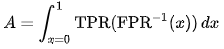

In [9]:
Image(filename='../images/def_auc_roc.png', width=200)

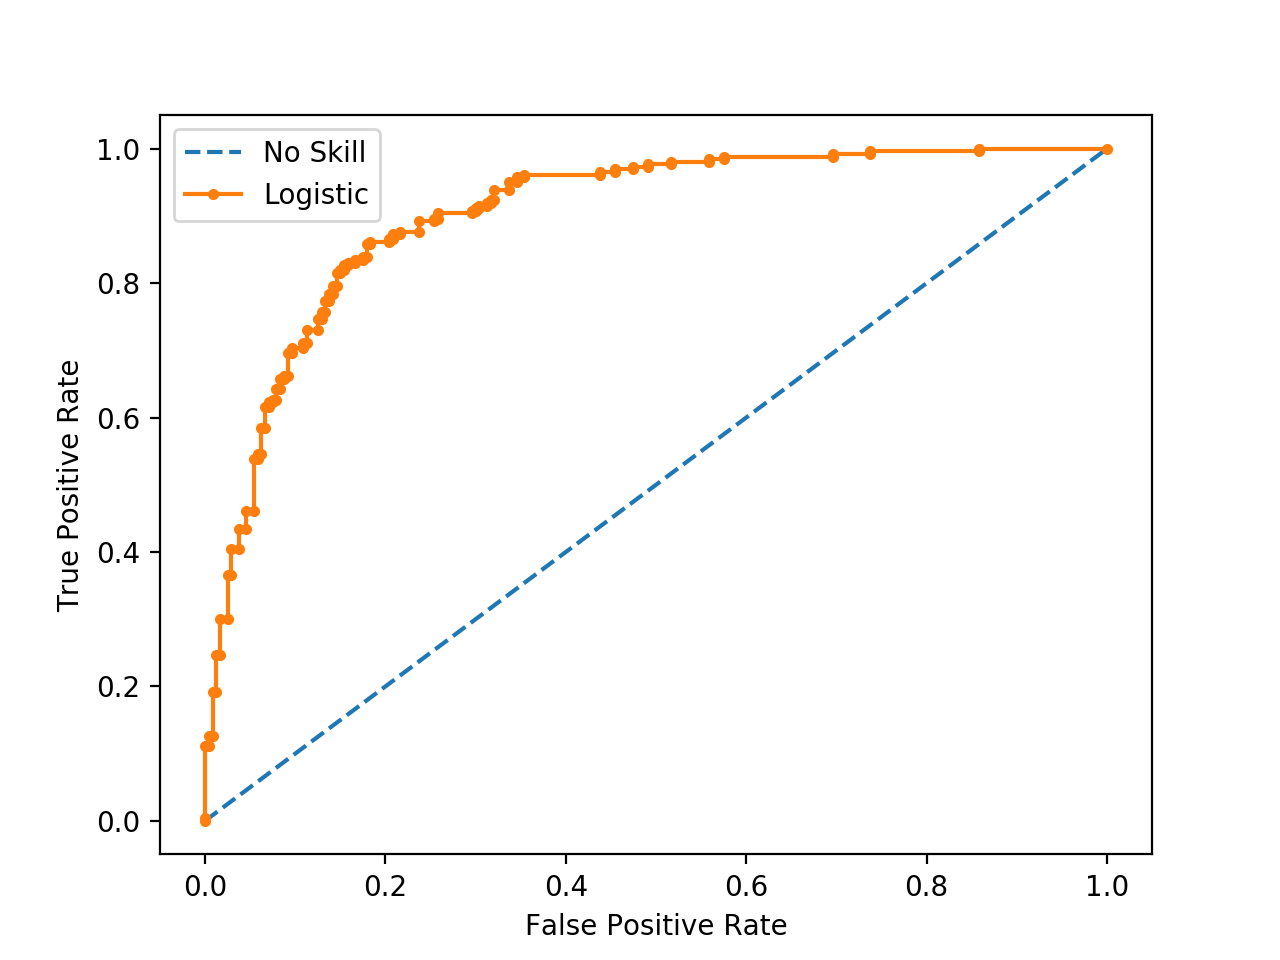

In [10]:
Image(filename='../images/roc_curve.png', width=500)

<a id="classification_data"></a>

# Classification: [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset)

In [11]:
# Use the following local filepath if you can't access the UCI url
wdbc_filepath = '../data/wisconsin_diagnostic_breast_cancer.csv'

headers = ['id', 'class', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
           'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
           'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
           'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
           'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

wdbc = pd.read_csv('https://archive.ics.uci.edu/ml/'
                   'machine-learning-databases'
                   '/breast-cancer-wisconsin/wdbc.data', names=headers)

In [12]:
wdbc.head()

,id,class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
wdbc.shape

(569, 32)

<a id="wdbc_descriptive_statistics"></a>

# View descriptive statistics

In [14]:
# Exclude the id column
# Delete .round(1) and uncomment to return only the count, min, and max
wdbc.iloc[:, 1:].describe().round(1)#.iloc[[0,3,7], :].T.round(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,14.1,19.3,92.0,654.9,0.1,0.1,0.1,0.0,0.2,0.1,...,16.3,25.7,107.3,880.6,0.1,0.3,0.3,0.1,0.3,0.1
std,3.5,4.3,24.3,351.9,0.0,0.1,0.1,0.0,0.0,0.0,...,4.8,6.1,33.6,569.4,0.0,0.2,0.2,0.1,0.1,0.0
min,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,0.0,...,7.9,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1
25%,11.7,16.2,75.2,420.3,0.1,0.1,0.0,0.0,0.2,0.1,...,13.0,21.1,84.1,515.3,0.1,0.1,0.1,0.1,0.3,0.1
50%,13.4,18.8,86.2,551.1,0.1,0.1,0.1,0.0,0.2,0.1,...,15.0,25.4,97.7,686.5,0.1,0.2,0.2,0.1,0.3,0.1
75%,15.8,21.8,104.1,782.7,0.1,0.1,0.1,0.1,0.2,0.1,...,18.8,29.7,125.4,1084.0,0.1,0.3,0.4,0.2,0.3,0.1
max,28.1,39.3,188.5,2501.0,0.2,0.3,0.4,0.2,0.3,0.1,...,36.0,49.5,251.2,4254.0,0.2,1.1,1.3,0.3,0.7,0.2


In [15]:
# wdbc.to_csv('../data/wisconsin_diagnostic_breast_cancer.csv', index=False)

<a id="create_y_and_X"></a>

# Create target (y) and features (X)

In [83]:
from sklearn.preprocessing import LabelEncoder

y = wdbc.iloc[:, 1].values
X = wdbc.iloc[:, 2:].values

le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [17]:
le.transform(['M', 'B'])

array([1, 0])

In [18]:
[(y_value, count) for (y_value, count) in enumerate(np.bincount(y))]

[(0, 357), (1, 212)]

<a id="train_test_split"></a>

# [train_test_split](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

"Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.  

This situation is called overfitting.  To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set." - scikit-learn team

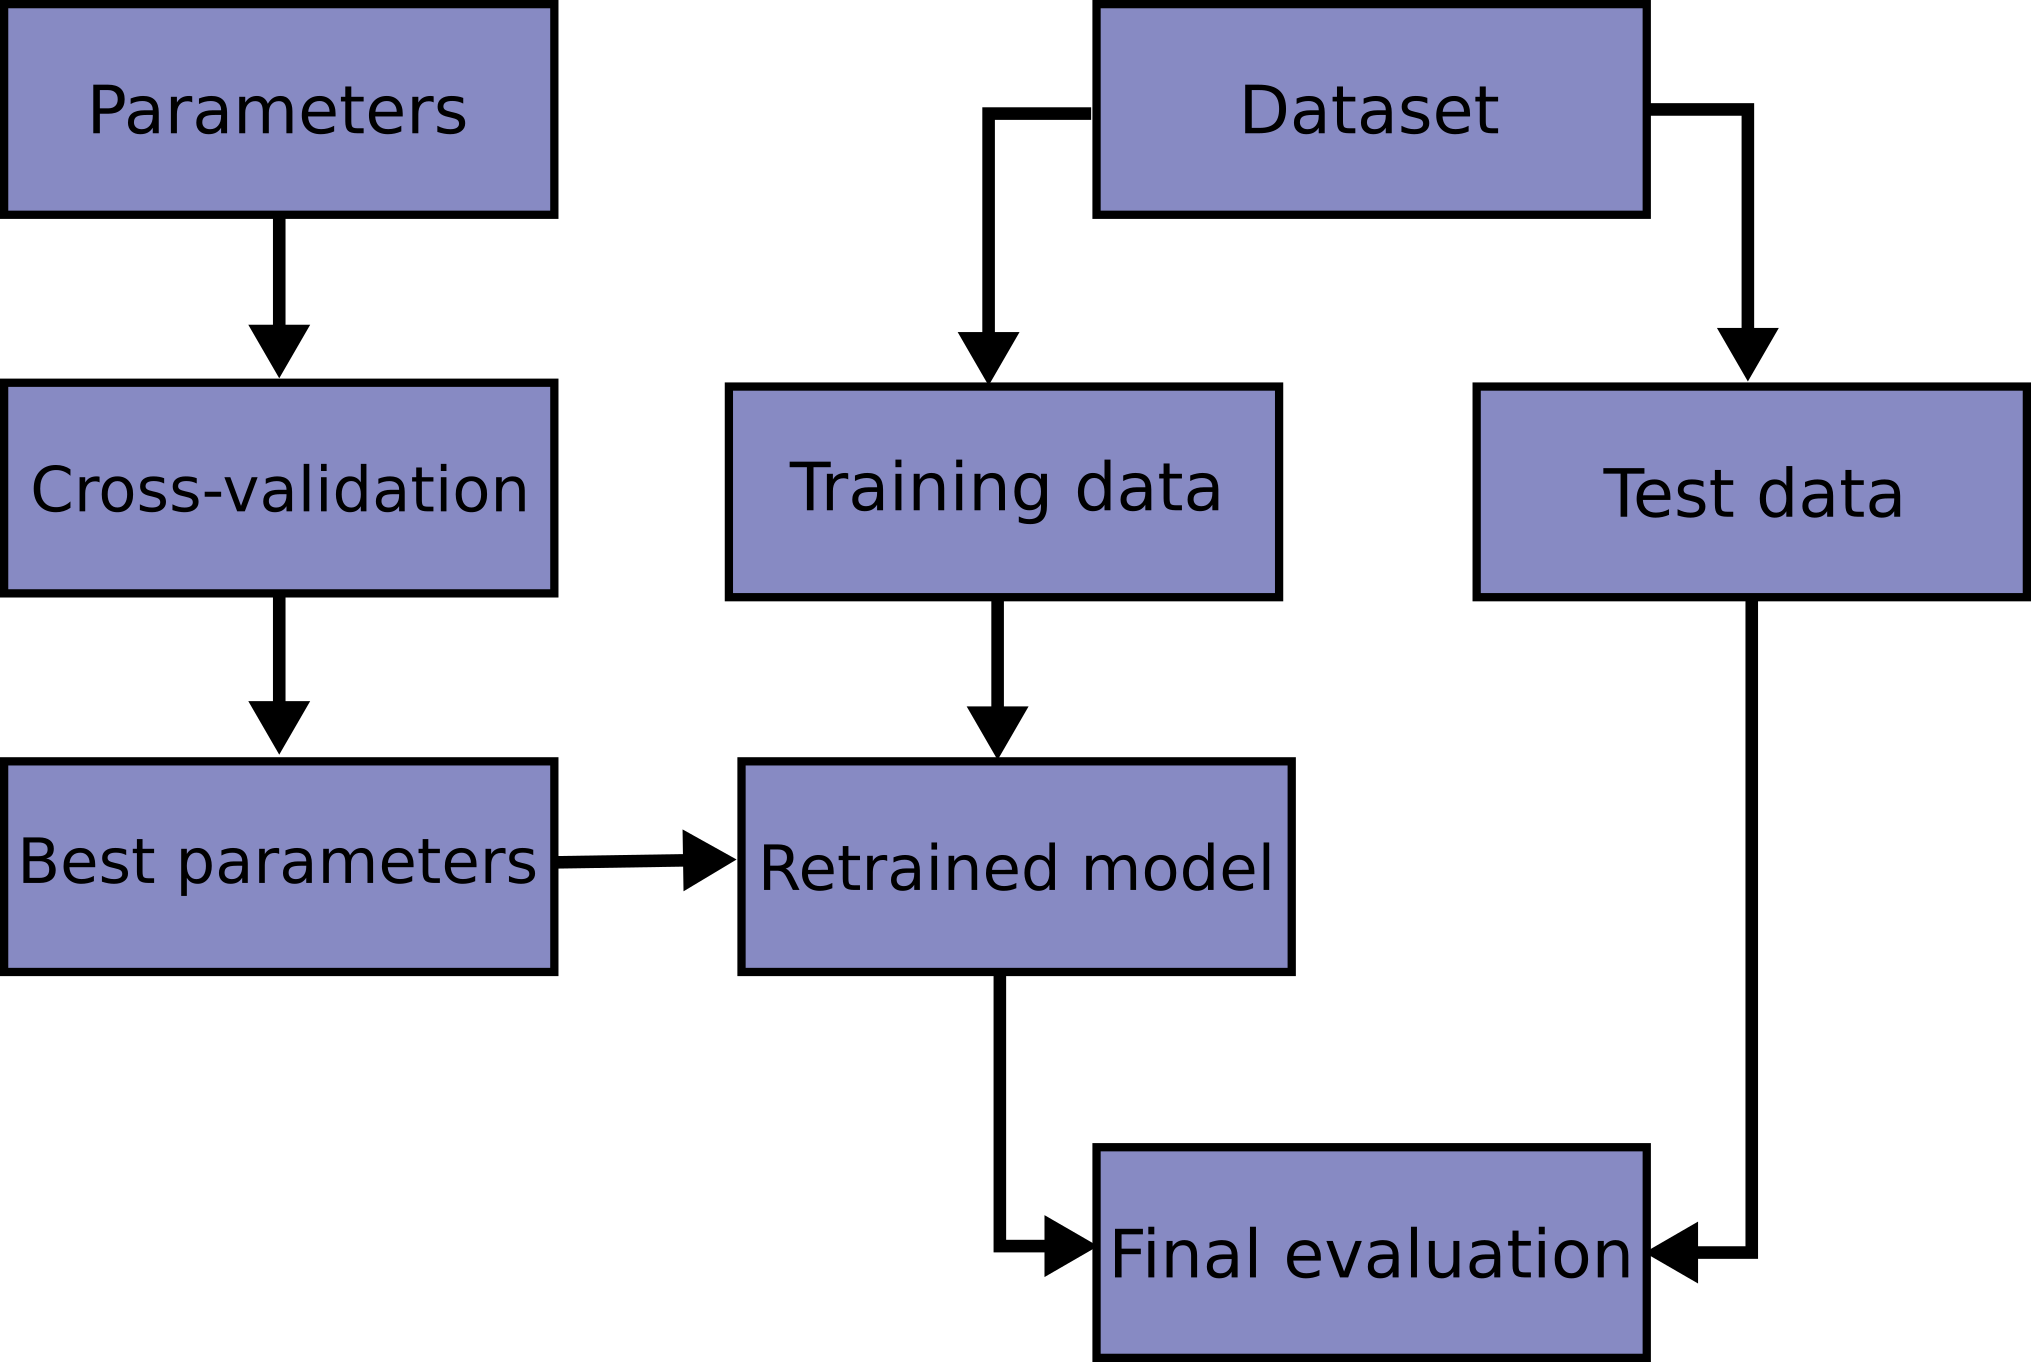

In [19]:
Image(filename='../images/train_test_split_evaluation_flow.png', width=400)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state=123)

<a id="dummy_classifier"></a>

# [DummyClassifier](https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators)

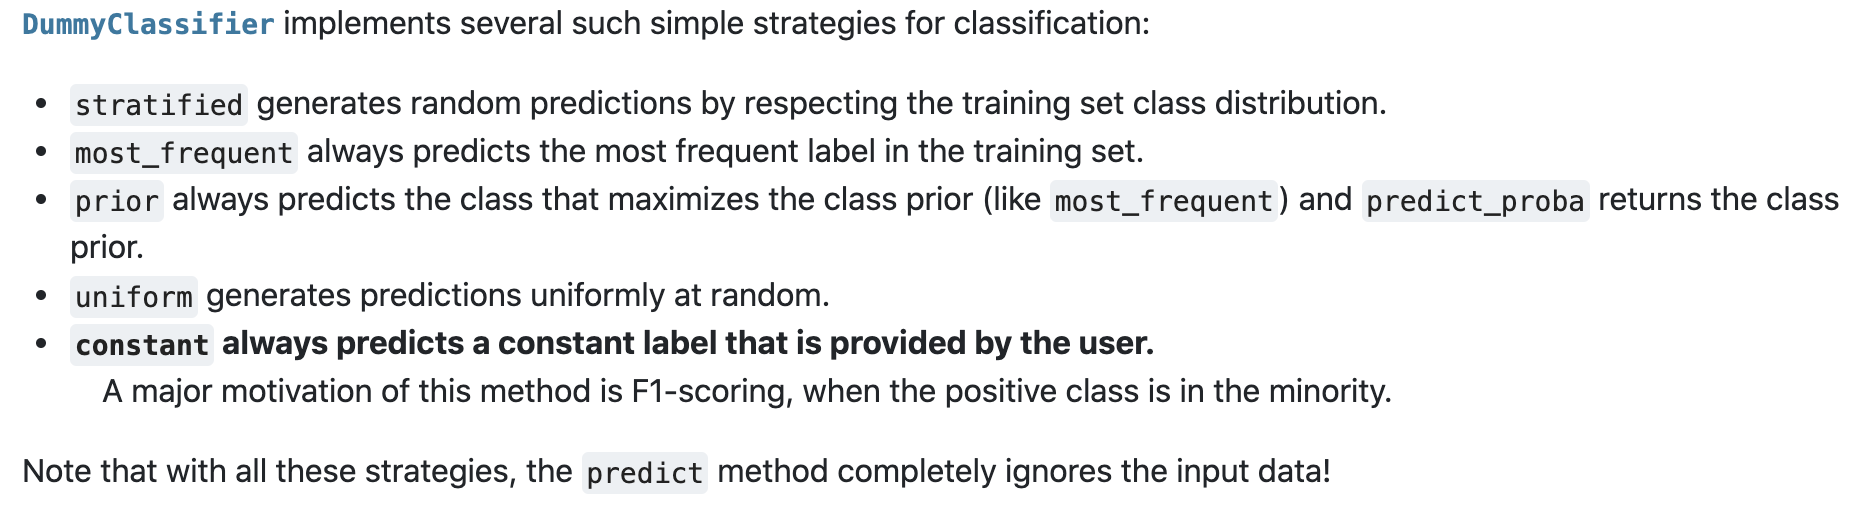

In [21]:
Image(filename='../images/dummy_classifier.png', width=800)

In [22]:
scaler = StandardScaler() 

dummy_clf = DummyClassifier(strategy='most_frequent', random_state=123)

dummy_clf.fit(scaler.fit_transform(X_train), y_train)

# preds = dummy_clf.predict(scaler.transform(X_test))
# preds[:20]

print('Test Accuracy: {:.3f}'.format(dummy_clf.score(scaler.transform(X_test), y_test))) # dummy_clf.score returns accuracy for classification

Test Accuracy: 0.632


In [23]:
[(le.classes_[y_value], round(count/len(y_test),3)) for (y_value, count) in enumerate(np.bincount(y_test))]

[('B', 0.632), ('M', 0.368)]

<a id="make_pipeline"></a>

# [Pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline): Scale, Fit, Predict, Score

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), 
                        LogisticRegression(random_state=123))

pipe_lr.fit(X_train, y_train)

# y_pred = pipe_lr.predict(X_test)
# y_pred[:20]

print('Test Accuracy: {:.3f}'.format(pipe_lr.score(X_test, y_test))) # Returns accuracy

Test Accuracy: 0.974


<a id="cross_validation_methods"></a>

# [Cross-validation methods](https://scikit-learn.org/stable/modules/cross_validation.html)

"If we partition the available data into three sets, i.e. training, validation, and test, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short).  A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV.  In the basic approach, called k-fold CV, the training set is split into k smaller sets.  The following procedure is followed for each of the k "folds":

  - A model is trained using  of the folds as training data
  - The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy)

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data." - scikit-learn team

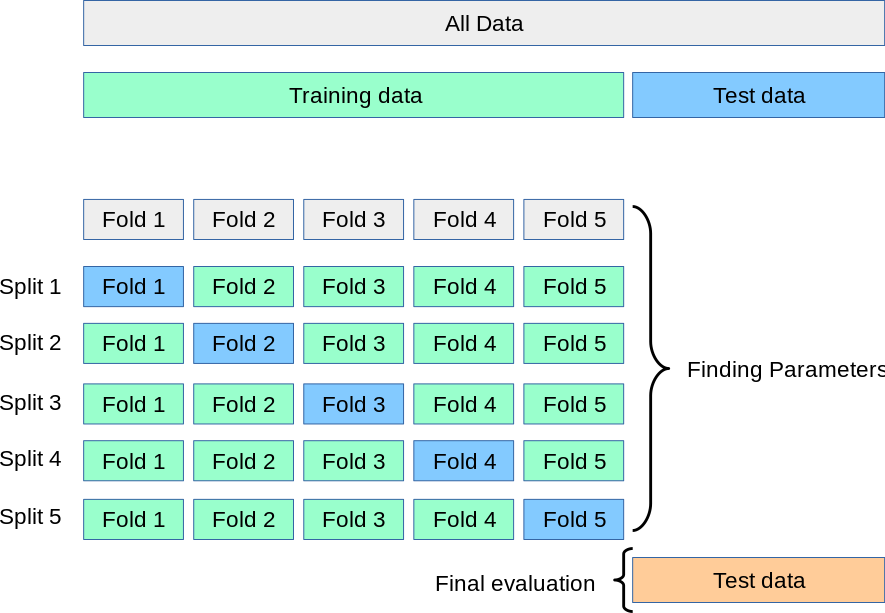

In [25]:
Image(filename='../images/kfold_cross_validation.png', width=500)

<a id="cross_val_score"></a>

# [cross_val_score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics)

In [26]:
scores = cross_val_score(pipe_lr, X_train, y_train, cv=10, scoring='accuracy')
print('Accuracy: {:.3f} std (+/- {:.3f})'.format(scores.mean(), scores.std()))

Accuracy: 0.978 std (+/- 0.022)


In [27]:
scores = cross_val_score(pipe_lr, X_train, y_train, cv=10, scoring='f1')
print('F1 score: {:.3f} std (+/- {:.3f})'.format(scores.mean(), scores.std()))

F1 score: 0.970 std (+/- 0.030)


<a id="stratified_kfold"></a>

# [StratifiedKFold](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold)

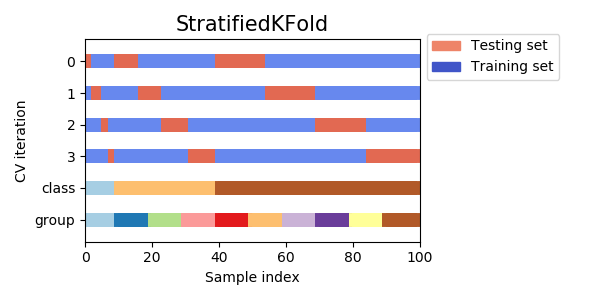

In [28]:
# Visualizing cross-validation behavior in scikit-learn
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html
# Data: 100 randomly generated input datapoints, 3 classes split unevenly across datapoints, 
# 10 "groups" split evenly across datapoints, 4-fold CV
Image(filename='../images/stratified_kfold.png', width=600)

In [29]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

scores = []
for k, (train, test) in enumerate(skfold.split(X_train, y_train)):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: {:2d}, Class dist.: {}, Accuracy: {:.3f}'.format(k+1, np.bincount(y_train[train]), score))
    
print('\nCV Accuracy: {:.3f} std (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Accuracy: 0.978
Fold:  2, Class dist.: [256 153], Accuracy: 0.957
Fold:  3, Class dist.: [256 153], Accuracy: 0.957
Fold:  4, Class dist.: [256 153], Accuracy: 1.000
Fold:  5, Class dist.: [256 153], Accuracy: 0.978
Fold:  6, Class dist.: [257 153], Accuracy: 0.956
Fold:  7, Class dist.: [257 153], Accuracy: 1.000
Fold:  8, Class dist.: [257 153], Accuracy: 1.000
Fold:  9, Class dist.: [257 153], Accuracy: 1.000
Fold: 10, Class dist.: [257 153], Accuracy: 0.978

CV Accuracy: 0.980 std (+/- 0.018)


In [30]:
scores = []
for k, (train, test) in enumerate(skfold.split(X_train, y_train)):
    pipe_lr.fit(X_train[train], y_train[train])
    preds = pipe_lr.predict(X_train[test])
    score = f1_score(preds, y_train[test])
    scores.append(score)
    print('Fold: {:2d}, Class dist.: {}, F1 score: {:.3f}'.format(k+1, np.bincount(y_train[train]), score))
    
print('\nCV F1 score: {:.3f} std (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], F1 score: 0.970
Fold:  2, Class dist.: [256 153], F1 score: 0.941
Fold:  3, Class dist.: [256 153], F1 score: 0.938
Fold:  4, Class dist.: [256 153], F1 score: 1.000
Fold:  5, Class dist.: [256 153], F1 score: 0.970
Fold:  6, Class dist.: [257 153], F1 score: 0.941
Fold:  7, Class dist.: [257 153], F1 score: 1.000
Fold:  8, Class dist.: [257 153], F1 score: 1.000
Fold:  9, Class dist.: [257 153], F1 score: 1.000
Fold: 10, Class dist.: [257 153], F1 score: 0.970

CV F1 score: 0.973 std (+/- 0.025)


<a id="oob_estimates"></a>

# [Out of Bag estimates](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py)

In [31]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=None, min_samples_split=2, 
                            oob_score=True, 
                            random_state=123)

rf = rf.fit(X_train, y_train)
print('Accuracy: {:.3f} '.format(rf.oob_score_))

Accuracy: 0.956 


<a id="grid_search"></a>

# Tuning hyperparameters via [exhaustive grid search](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search)

In [32]:
pipe_sgd = make_pipeline(StandardScaler(), 
                         SGDClassifier(loss='hinge', penalty='elasticnet', fit_intercept=True, 
                                       random_state=123))

param_grid = {'sgdclassifier__average': [True, False],
              'sgdclassifier__l1_ratio': np.linspace(0, 1, num=10),
              'sgdclassifier__alpha': np.power(10, np.arange(-4, 1, dtype=float))}

sgd_gs = GridSearchCV(pipe_sgd, 
                      param_grid=param_grid, 
                      scoring='accuracy', 
                      cv=10, 
                      n_jobs=-1)

sgd_gs = sgd_gs.fit(X_train, y_train)
print('Best training accuracy: {:.3f}'.format(sgd_gs.best_score_))
print('Best training parameters: {}'.format(sgd_gs.best_params_))

Best training accuracy: 0.980
Best training parameters: {'sgdclassifier__alpha': 0.01, 'sgdclassifier__average': False, 'sgdclassifier__l1_ratio': 0.1111111111111111}


In [33]:
print('Test accuracy: {:.3f}'.format(sgd_gs.score(X_test, y_test)))

Test accuracy: 0.982


<a id="randomized_search"></a>

# Tuning hyperparameters via [randomized search](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)

In [34]:
pipe_sgd = make_pipeline(StandardScaler(), 
                         SGDClassifier(loss='hinge', penalty='elasticnet', fit_intercept=True, 
                                       random_state=123))

param_dist = {'sgdclassifier__average': [True, False],
              'sgdclassifier__l1_ratio': stats.uniform(0, 1),
              'sgdclassifier__alpha': loguniform(1e-4, 1e0)}

n_iter_search = 20
sgd_rs = RandomizedSearchCV(pipe_sgd, 
                            param_distributions=param_dist, 
                            n_iter=n_iter_search, 
                            scoring='accuracy', 
                            cv=10, 
                            n_jobs=-1)

sgd_rs = sgd_rs.fit(X_train, y_train)
print('Best training accuracy: {:.3f}'.format(sgd_rs.best_score_))
print('Best training parameters: {}'.format(sgd_rs.best_params_))

Best training accuracy: 0.983
Best training parameters: {'sgdclassifier__alpha': 0.037013154309546874, 'sgdclassifier__average': False, 'sgdclassifier__l1_ratio': 0.3759040184595739}


In [35]:
print('Test accuracy: {:.3f}'.format(sgd_rs.score(X_test, y_test)))

Test accuracy: 0.965


<a id="bayesian_optimization"></a>

# Tuning hyperparameters via [Bayesian Optimization](https://ax.dev/docs/bayesopt.html)

In [85]:
# SOURCE: https://ax.dev/tutorials/tune_cnn.html

from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render, init_notebook_plotting
from ax.utils.tutorials.cnn_utils import train, evaluate

In [86]:
# scale features

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [87]:
def sgdc_evaluation_function(
    parameterization, # dict of parameter names to values of those parameters
    weight=None, # required by the evaluation function signature
):
    
    # create train + test data
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                        test_size=0.30, 
                                                        stratify=y, 
                                                        random_state=123)

    # fit model
    clf = SGDClassifier(loss='log_loss', penalty='elasticnet', fit_intercept=True, random_state=123, 
                        #average=parameterization["average"], 
                        l1_ratio=parameterization["l1_ratio"], 
                        alpha=parameterization["alpha"])
    clf.fit(X_train, y_train)
    
    
    # diagnostics
    accuracy = clf.score(X_test, y_test)
    return {
        'accuracy': (accuracy, 0.0), 
    }

In [88]:
best_parameters, values, experiment, model = optimize(
    parameters=[
        #{"name": "average", "type": "choice", "values": [1, 0], "value_type": "bool"},
        {"name": "l1_ratio", "type": "range", "bounds": [0.1, 1.0], "value_type": "float"},
        {"name": "alpha", "type": "range", "bounds": [1e-4, 1e4], "log_scale": True, "value_type": "float"},
    ],
    evaluation_function=sgdc_evaluation_function,
    objective_name='accuracy',
)

[INFO 06-16 13:00:57] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='l1_ratio', parameter_type=FLOAT, range=[0.1, 1.0]), RangeParameter(name='alpha', parameter_type=FLOAT, range=[0.0001, 10000.0], log_scale=True)], parameter_constraints=[]).
[INFO 06-16 13:00:57] ax.modelbridge.dispatch_utils: Using Bayesian optimization since there are more ordered parameters than there are categories for the unordered categorical parameters.
[INFO 06-16 13:00:57] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 trials, GPEI for subsequent trials]). Iterations after 5 will take longer to generate due to  model-fitting.
[INFO 06-16 13:00:57] ax.service.managed_loop: Started full optimization with 20 steps.
[INFO 06-16 13:00:57] ax.service.managed_loop: Running optimization trial 1...
[INFO 06-16 13:00:57] ax.service.managed_loop: Running optimization trial 2...
[IN

We can introspect the optimal parameters and their outcomes:

In [89]:
best_parameters

{'l1_ratio': 0.24032769368745202, 'alpha': 0.03858952115893157}

In [90]:
means, covariances = values
means, covariances

({'accuracy': 0.9824417937247034},
 {'accuracy': {'accuracy': 1.6124864085595618e-08}})

### Plot response surface¶

Contour plot showing classification accuracy as a function of the two hyperparameters.

The black squares show points that we have actually run, notice how they are clustered in the optimal region.

In [91]:
render(plot_contour(model=model, param_x='l1_ratio', param_y='alpha', metric_name='accuracy'))

### Plot best objective as function of the iteration¶

Show the model accuracy improving as we identify better hyperparameters.

In [92]:
# `plot_single_method` expects a 2-d array of means, because it expects to average means from multiple 
# optimization runs, so we wrap out best objectives array in another array.

best_objectives = np.array([[trial.objective_mean*100 for trial in experiment.trials.values()]])

best_objective_plot = optimization_trace_single_method(
    y=np.maximum.accumulate(best_objectives, axis=1),
    title="Model performance vs. # of iterations",
    ylabel="Classification Accuracy, %",
)

render(best_objective_plot)

### Train SGDClassifier with best hyperparameters and evaluate on test set¶

Note that the resulting accuracy on the test set might not be exactly the same as the maximum accuracy achieved on the evaluation set throughout optimization.

In [93]:
data = experiment.fetch_data()
df = data.df
best_arm_name = df.arm_name[df['mean'] == df['mean'].max()].values[0]
best_arm = experiment.arms_by_name[best_arm_name]
best_arm

Arm(name='10_0', parameters={'l1_ratio': 0.24032769368745202, 'alpha': 0.03858952115893157})

In [94]:
clf = SGDClassifier(loss='log_loss', penalty='elasticnet', fit_intercept=True, random_state=123, 
                    l1_ratio=best_arm.parameters["l1_ratio"], 
                    alpha=best_arm.parameters["alpha"])

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

clf.fit(X_train_std, y_train)

# predictive performance
preds = clf.predict(X_test_std)
acc  = accuracy_score(y_test, preds)

print('Test Accuracy: {:.3f}'.format(acc))

Test Accuracy: 0.982


<a id="regression_metrics"></a>

# [Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

## Root Mean Squared Error (RMSE)

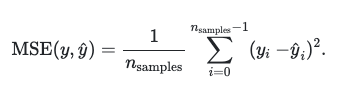

In [97]:
Image(filename='../images/def_mse.png', width=300)

## R² score, the coefficient of determination

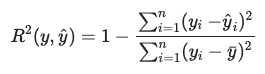

In [98]:
Image(filename='../images/def_r2.png', width=250)

<a id="regression_data"></a>

# Regression: [Boston house prices dataset](https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset)

In [99]:
# Use the following local filepath if you can't access the UCI url
bhp_filepath = '../data/boston_house_prices.csv'

headers = ['crime_rate_per_capita', 'lot_zoning_proportion', 'non_retail_acres', 'by_charles_river', 
           'nitric_oxides_pp10m', 'avg_number_of_rooms', 'pre_1940_proportion', 'employment_centers_distances', 
           'highway_accessibility', 'property_tax_rate', 'pupil_teacher_ratio', 'black_proportion', 
           'lower_pop_status_percent', 'median_home_value']

bhp = pd.read_fwf('https://archive.ics.uci.edu/ml/'
                  'machine-learning-databases'
                  '/housing/housing.data', names=headers)

In [100]:
bhp.head()

,crime_rate_per_capita,lot_zoning_proportion,non_retail_acres,by_charles_river,nitric_oxides_pp10m,avg_number_of_rooms,pre_1940_proportion,employment_centers_distances,highway_accessibility,property_tax_rate,pupil_teacher_ratio,black_proportion,lower_pop_status_percent,median_home_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [101]:
bhp.shape

(506, 14)

<a id="boston_descriptive_statistics"></a>

# View descriptive statistics

In [102]:
# Delete .round(1) and uncomment to return only the count, min, and max
bhp.describe().round(1)#.iloc[[0,3,7], :].T.round(3)

,crime_rate_per_capita,lot_zoning_proportion,non_retail_acres,by_charles_river,nitric_oxides_pp10m,avg_number_of_rooms,pre_1940_proportion,employment_centers_distances,highway_accessibility,property_tax_rate,pupil_teacher_ratio,black_proportion,lower_pop_status_percent,median_home_value
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,1.7,11.4,11.1,0.1,0.6,6.3,68.6,3.7,4.3,408.2,18.5,356.7,12.7,22.5
std,2.7,23.3,6.9,0.3,0.1,0.7,28.1,2.0,1.4,168.5,2.2,91.3,7.1,9.2
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,0.6,1.0,187.0,12.6,0.3,1.7,5.0
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,7.0,17.0
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.1,4.0,330.0,19.0,391.4,11.4,21.2
75%,2.3,12.5,18.1,0.0,0.6,6.6,94.1,5.1,5.0,666.0,20.2,396.2,17.0,25.0
max,10.0,100.0,27.7,1.0,0.9,8.8,100.0,9.2,8.0,711.0,22.0,396.9,38.0,50.0


In [103]:
# bhp.to_csv('../data/boston_house_prices.csv', index=False)

<a id="boston_create_y_and_X"></a>

# Create target (y) and features (X)

In [104]:
y = bhp.iloc[:, -1].values
X = bhp.iloc[:, :-1].values

<a id="boston_train_test_split"></a>

# [train_test_split](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=123)

<a id="dummy_regressor"></a>

# [DummyRegressor](https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators)

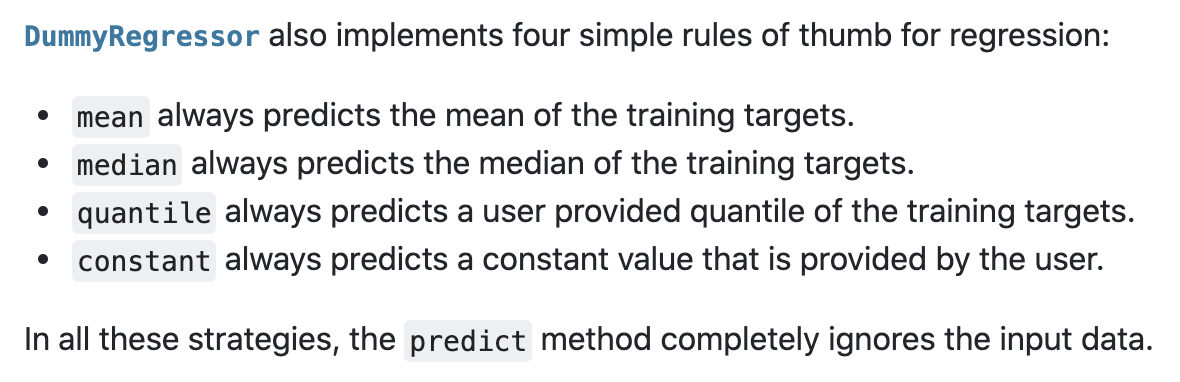

In [106]:
Image(filename='../images/dummy_regressor.png', width=600)

In [107]:
scaler = StandardScaler() 

dummy_regr = DummyRegressor(strategy='mean')

dummy_regr.fit(scaler.fit_transform(X_train), y_train)

# preds = dummy_regr.predict(scaler.transform(X_test))
# preds[:20]

print('Test R^2: {:.3f}'.format(dummy_regr.score(scaler.transform(X_test), y_test))) # dummy_regr.score returns R^2 for regression

Test R^2: -0.007


<a id="boston_make_pipeline"></a>

# [Pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline): Scale, Fit, Predict, Score

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), 
                        LinearRegression())

pipe_lr.fit(X_train, y_train)

#y_pred = pipe_lr.predict(X_test)
#y_pred[:20]

print('Test R^2: {:.3f}'.format(pipe_lr.score(X_test, y_test))) # Returns R^2, the coefficient of determination

Test R^2: 0.632


<a id="boston_cross_validation_methods"></a>

# [Cross-validation methods](https://scikit-learn.org/stable/modules/cross_validation.html)

<a id="boston_cross_val_score"></a>

# [cross_val_score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics)

In [109]:
scores = cross_val_score(pipe_lr, X_train, y_train, cv=10, scoring='r2')
print('R^2: {:.3f} std (+/- {:.3f})'.format(scores.mean(), scores.std()))

R^2: 0.689 std (+/- 0.118)


In [110]:
scores = cross_val_score(pipe_lr, X_train, y_train, cv=10, scoring='explained_variance') # 'neg_root_mean_squared_error' 
print('Explained variance: {:.3f} std (+/- {:.3f})'.format(scores.mean(), scores.std()))

Explained variance: 0.697 std (+/- 0.119)


<a id="boston_kfold"></a>

# [Kfold](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)

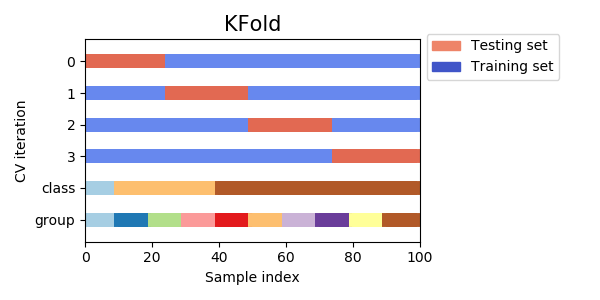

In [111]:
# Visualizing cross-validation behavior in scikit-learn
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html
# Data: 100 randomly generated input datapoints, 3 classes split unevenly across datapoints, 
# 10 "groups" split evenly across datapoints, 4-fold CV
Image(filename='../images/kfold.png', width=600)

In [112]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)

scores = []
for k, (train, test) in enumerate(kfold.split(X_train, y_train)):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: {:2d}, R^2: {:.3f}'.format(k+1, score))
    
print('\nCV R^2: {:.3f} std (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, R^2: 0.560
Fold:  2, R^2: 0.696
Fold:  3, R^2: 0.780
Fold:  4, R^2: 0.724
Fold:  5, R^2: 0.690
Fold:  6, R^2: 0.797
Fold:  7, R^2: 0.621
Fold:  8, R^2: 0.646
Fold:  9, R^2: 0.692
Fold: 10, R^2: 0.812

CV R^2: 0.702 std (+/- 0.076)


In [113]:
scores = []
for k, (train, test) in enumerate(kfold.split(X_train, y_train)):
    pipe_lr.fit(X_train[train], y_train[train])
    preds = pipe_lr.predict(X_train[test])
    score = mean_squared_error(preds, y_train[test], squared=False)
    scores.append(score)
    print('Fold: {:2d}, RMSE: {:.3f}'.format(k+1, score))
    
print('\nCV RMSE: {:.3f} std (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, RMSE: 7.180
Fold:  2, RMSE: 5.442
Fold:  3, RMSE: 4.590
Fold:  4, RMSE: 5.067
Fold:  5, RMSE: 4.854
Fold:  6, RMSE: 3.864
Fold:  7, RMSE: 6.723
Fold:  8, RMSE: 3.986
Fold:  9, RMSE: 3.319
Fold: 10, RMSE: 3.757

CV RMSE: 4.878 std (+/- 1.210)


<a id="boston_oob_estimates"></a>

# [Out of Bag estimates](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py)

In [114]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

rf = RandomForestRegressor(n_estimators=200, 
                           max_depth=None, min_samples_split=2, 
                           oob_score=True, 
                           random_state=123)

rf = rf.fit(X_train, y_train)
print('R^2: {:.3f} '.format(rf.oob_score_))

R^2: 0.846 


<a id="boston_grid_search"></a>

# Tuning hyperparameters via [exhaustive grid search](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search)

In [115]:
pipe_sgd = make_pipeline(StandardScaler(), 
                         SGDRegressor(loss='squared_error', penalty='elasticnet', fit_intercept=True, 
                                      random_state=123))

param_grid = {'sgdregressor__average': [True, False],
              'sgdregressor__l1_ratio': np.linspace(0, 1, num=10),
              'sgdregressor__alpha': np.power(10, np.arange(-4, 1, dtype=float))}

sgd_gs = GridSearchCV(pipe_sgd, 
                      param_grid=param_grid, 
                      scoring='neg_root_mean_squared_error', 
                      cv=10, 
                      n_jobs=-1)

sgd_gs = sgd_gs.fit(X_train, y_train)
print('Best training RMSE: {:.3f}'.format(-sgd_gs.best_score_))
print('Best training parameters: {}'.format(sgd_gs.best_params_))

Best training RMSE: 4.805
Best training parameters: {'sgdregressor__alpha': 0.1, 'sgdregressor__average': False, 'sgdregressor__l1_ratio': 0.6666666666666666}


In [116]:
preds = sgd_gs.predict(X_test)
score = mean_squared_error(y_test, preds, squared=False)
print('Test RMSE: {:.3f}'.format(score))

Test RMSE: 5.546


<a id="boston_randomized_search"></a>

# Tuning hyperparameters via [randomized search](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)

In [117]:
pipe_sgd = make_pipeline(StandardScaler(), 
                         SGDRegressor(loss='squared_error', penalty='elasticnet', fit_intercept=True, 
                                      random_state=123))

param_dist = {'sgdregressor__average': [True, False], 
              'sgdregressor__l1_ratio': stats.uniform(0, 1), 
              'sgdregressor__alpha': loguniform(1e-4, 1e0)}

n_iter_search = 20
sgd_rs = RandomizedSearchCV(pipe_sgd, 
                            param_distributions=param_dist, 
                            n_iter=n_iter_search, 
                            scoring='neg_root_mean_squared_error', 
                            cv=10, 
                            n_jobs=-1)

sgd_rs = sgd_rs.fit(X_train, y_train)
print('Best training RMSE: {:.3f}'.format(-sgd_rs.best_score_))
print('Best training parameters: {}'.format(sgd_rs.best_params_))

Best training RMSE: 4.810
Best training parameters: {'sgdregressor__alpha': 0.11291442649487526, 'sgdregressor__average': False, 'sgdregressor__l1_ratio': 0.41434670259322814}


In [118]:
preds = sgd_rs.predict(X_test)
score = mean_squared_error(y_test, preds, squared=False)
print('Test RMSE: {:.3f}'.format(score))

Test RMSE: 5.520


<a id="boston_bayesian_optimization"></a>

# Tuning hyperparameters via [Bayesian Optimization](https://ax.dev/docs/bayesopt.html)

In [119]:
# SOURCE: https://ax.dev/tutorials/tune_cnn.html

from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render, init_notebook_plotting
from ax.utils.tutorials.cnn_utils import train, evaluate

In [120]:
# scale features

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [121]:
def sgdr_evaluation_function(
    parameterization, # dict of parameter names to values of those parameters
    weight=None, # required by the evaluation function signature
):
    
    # create train + test data
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                        test_size=0.30, 
                                                        random_state=0)

    # fit model
    ols = SGDRegressor(loss='squared_error', penalty='elasticnet', fit_intercept=True, random_state=123, 
                       #average=parameterization["average"], 
                       l1_ratio=parameterization["l1_ratio"], 
                       alpha=parameterization["alpha"])
    ols.fit(X_train, y_train)
    
    
    # diagnostics
    preds = ols.predict(X_test)
    rmse  = mean_squared_error(y_test, preds, squared=False)
    return {
        'rmse': (rmse, 0.0)
    }

In [122]:
best_parameters, values, experiment, model = optimize(
    parameters=[
        #{"name": "average", "type": "choice", "values": [1, 0], "value_type": "bool"},
        {"name": "l1_ratio", "type": "range", "bounds": [0.1, 1.0], "value_type": "float"},
        {"name": "alpha", "type": "range", "bounds": [1e-3, 1e1], "log_scale": True, "value_type": "float"},
    ],
    evaluation_function=sgdr_evaluation_function,
    objective_name='rmse',
)

[INFO 06-16 13:01:32] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='l1_ratio', parameter_type=FLOAT, range=[0.1, 1.0]), RangeParameter(name='alpha', parameter_type=FLOAT, range=[0.001, 10.0], log_scale=True)], parameter_constraints=[]).
[INFO 06-16 13:01:32] ax.modelbridge.dispatch_utils: Using Bayesian optimization since there are more ordered parameters than there are categories for the unordered categorical parameters.
[INFO 06-16 13:01:32] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 trials, GPEI for subsequent trials]). Iterations after 5 will take longer to generate due to  model-fitting.
[INFO 06-16 13:01:32] ax.service.managed_loop: Started full optimization with 20 steps.
[INFO 06-16 13:01:32] ax.service.managed_loop: Running optimization trial 1...
[INFO 06-16 13:01:32] ax.service.managed_loop: Running optimization trial 2...
[INFO 0

We can introspect the optimal parameters and their outcomes:

In [123]:
best_parameters

{'l1_ratio': 0.8189010687662689, 'alpha': 10.0}

In [124]:
means, covariances = values
means, covariances

({'rmse': 9.153873339771785}, {'rmse': {'rmse': 2.0398043843777358e-06}})

### Plot response surface¶

Contour plot showing classification accuracy as a function of the two hyperparameters.

The black squares show points that we have actually run, notice how they are clustered in the optimal region.

In [125]:
render(plot_contour(model=model, param_x='l1_ratio', param_y='alpha', metric_name='rmse'))

### Plot best objective as function of the iteration¶

Show the model accuracy improving as we identify better hyperparameters.

In [126]:
# `plot_single_method` expects a 2-d array of means, because it expects to average means from multiple 
# optimization runs, so we wrap out best objectives array in another array.

best_objectives = np.array([[trial.objective_mean for trial in experiment.trials.values()]])

best_objective_plot = optimization_trace_single_method(
    y=np.maximum.accumulate(best_objectives, axis=1),
    title="Model performance vs. # of iterations",
    ylabel="Regression RMSE",
)

render(best_objective_plot)

### Train SGDRegressor with best hyperparameters and evaluate on test set¶

Note that the resulting performance on the test set might not be exactly the same as the maximum performance achieved on the evaluation set throughout optimization.

In [127]:
data = experiment.fetch_data()
df = data.df
best_arm_name = df.arm_name[df['mean'] == df['mean'].max()].values[0]
best_arm = experiment.arms_by_name[best_arm_name]
best_arm

Arm(name='11_0', parameters={'l1_ratio': 0.7643096807539689, 'alpha': 10.0})

In [128]:
sgdr = SGDRegressor(loss='squared_error', penalty='elasticnet', fit_intercept=True, random_state=123, 
                    l1_ratio=best_arm.parameters["l1_ratio"], 
                    alpha=best_arm.parameters["alpha"])

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

sgdr.fit(X_train_std, y_train)

# predictive performance
preds = sgdr.predict(X_test_std)
rmse  = mean_squared_error(y_test, preds, squared=False)

print('Test RMSE: {:.3f}'.format(rmse))

Test RMSE: 9.128


<a id="learning_curve"></a>

# [Learning curve](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curve)

A **learning curve** shows the validation and training score of an estimator for varying numbers of training samples.  It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

In [129]:
from sklearn.preprocessing import LabelEncoder

y = wdbc.iloc[:, 1].values
X = wdbc.iloc[:, 2:].values

le = LabelEncoder()
y = le.fit_transform(y)

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state=123)

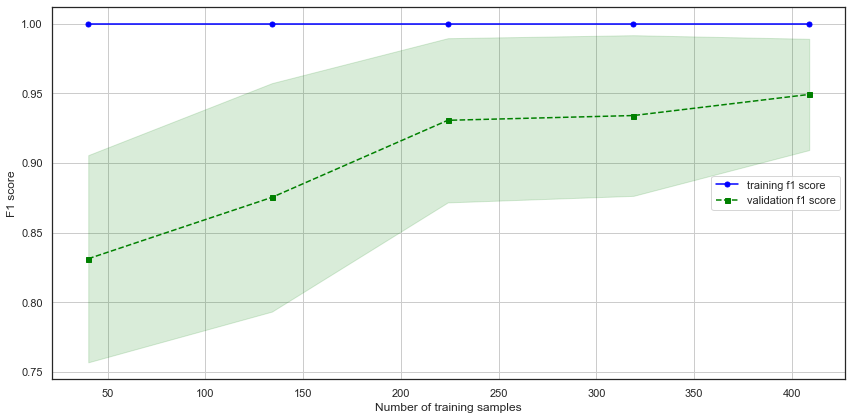

In [131]:
pipe_gbc = make_pipeline(StandardScaler(), 
                         GradientBoostingClassifier(random_state=123))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_gbc, 
                                                        scoring='f1',
                                                        X=X_train, y=y_train, 
                                                        train_sizes=[0.1, 0.33, 0.55, 0.78, 1.], 
                                                        cv=10, 
                                                        shuffle=True,
                                                        random_state=123,
                                                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1, ddof=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1, ddof=1)

plt.figure(figsize=(12,6))
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training f1 score')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation f1 score')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('F1 score')
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

<a id="validation_curve"></a>

# [Validation curve](https://scikit-learn.org/stable/modules/learning_curve.html#validation-curve)

A **validation curve** shows the influence of a single hyperparameter on the training score and the validation score to find out whether the estimator is overfitting or underfitting for some hyperparameter values.

If the training score and the validation score are both low, the estimator will be underfitting. If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well.  A low training score and a high validation score is usually not possible.

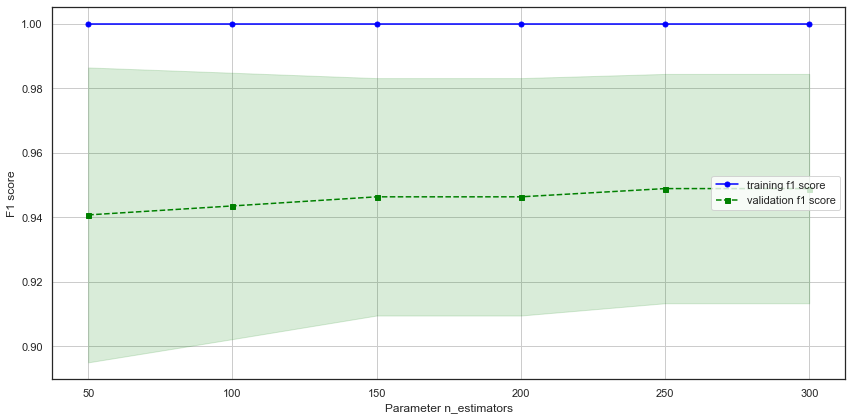

In [132]:
param_range = [50, 100, 150, 200, 250, 300]

train_scores, test_scores = validation_curve(estimator=pipe_gbc,
                                             scoring='f1',
                                             X=X_train, y=y_train, 
                                             param_name='gradientboostingclassifier__n_estimators', 
                                             param_range=param_range, 
                                             cv=10, 
                                             n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1, ddof=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1, ddof=1)

plt.figure(figsize=(12,6))
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training f1 score')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation f1 score')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='center right')
plt.xlabel('Parameter n_estimators')
plt.ylabel('F1 score')
plt.tight_layout()
plt.show()

[Back to top](#top)